## Dataset - Mall Customers

The objective is to know better the clients, in this dataset we have a spending score, ranging from 1 to 100, which means the expected amount that that client will spend on the mall.

## K-Means Clustering

### Importing the libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
dataset = pd.read_csv("../../../../datasets/ml_az_course/008_mall_customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# in order to be able to visualise the final clusters, we only will use two features
x = dataset.iloc[:, 3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
x = x.values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Using the Elbow Method to find the optimal number of clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
k_possible_values = range(1, 11)

# Within-Cluster Sum of Square, WCSS: The sum of the square distance between points in a cluster and the cluster centroid.
wcss = list()

for k in k_possible_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X=x)

    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.072849014323]


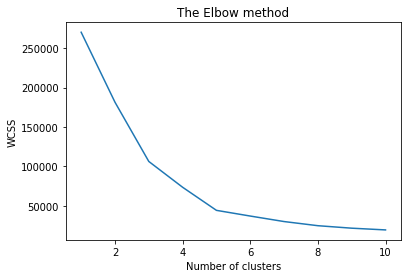

In [8]:
plt.plot(k_possible_values, wcss)

plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

plt.show()

We can note that the optimal value is the 5th value, i.e  `K=5`.

### Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y = kmeans.fit_predict(X=x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

The final labels (dependent variable) are 0, 1, 2, 3, and 4, the labels of the clusters.

### Visualising the clusters

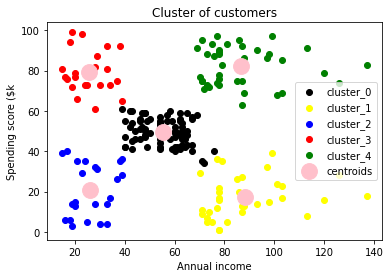

In [19]:
cluster_labels = range(0, 5) # [0-4]
colors = ("black", "yellow", "blue", "red", "green")

for label, color in zip(cluster_labels, colors):
    plt.scatter(x=x[y == label, 0], y=x[y == label, 1], c=color, label=f"cluster_{label}")

# plot the centroids, too
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=250, c="pink", label="centroids")

plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score ($k")
plt.legend()
plt.show()

If we will use this insights to target new offers and products. We need to care of red ones, because of social responsability. And maybe, always prioritize to target the green ones. Also look for a strategy to improve the spending score of the yellow ones.